Cancer treatments can affect the immune system and its ability to respond to infection (going to discuss this more). I am looking at how the timing of the cancer treatment could affect the severity of Covid by potentially compromising the immune system and its ability to respond to infection. I will further analyze the data by looking at the type of cancer treatment and the type of cancer the patients were experiencing. 

https://www.cancer.org/cancer/managing-cancer/side-effects/low-blood-counts/infections/why-people-with-cancer-are-at-risk.html

In [54]:
#!pip install pyreadr

import pandas as pd
import matplotlib.pyplot as plt

read_file = pd.read_csv (r'dataset')
read_file.to_csv (r'dataset.csv', index=None)

filepath = "dataset.csv"
dataset_df = pd.read_csv(filepath)

# for col in dataset_df.columns:
#     print(col)

dataset_df.dropna(subset=['der_cancer_tx_timing_v2'], inplace=True)

# new_df = dataset_df["der_cancer_tx_timing_v2"]
# new_df.sample(20)

clean_df = dataset_df[["der_cancer_tx_timing_v2", "der_cancer_status_v4", "severity_of_covid_19_v2"]]

clean_df.head(20)

,der_cancer_tx_timing_v2,der_cancer_status_v4,severity_of_covid_19_v2
0,0-4 weeks,Active and responding,Severe
2,0-4 weeks,NaN,Moderate
3,Never,Unknown,Moderate
4,0-4 weeks,Active and responding,Mild
5,0-4 weeks,"Remission or no evidence of disease, <5 years",Mild
6,0-4 weeks,Active and stable,Mild
7,>3 months,NaN,Mild
8,0-4 weeks,Active and responding,Mild
9,Never,Active and stable,Mild
10,0-4 weeks,Active and responding,Mild


In [55]:
# Comparing the severity of Covid to the timing of their cancer treatment after Covid

treatment_timing = clean_df.groupby(["der_cancer_tx_timing_v2"])["severity_of_covid_19_v2"].value_counts()
print(treatment_timing)

zero_to_four_total = 510+188+21
zero_to_four_mil = round(510/zero_to_four_total*100, 2)
zero_to_four_mod = round(188/zero_to_four_total*100, 2)
zero_to_four_sev = round(21/zero_to_four_total*100, 2)
zero_to_four_list = [zero_to_four_mil, zero_to_four_mod, zero_to_four_sev]

one_to_three_total = 51+16+2
one_to_three_mil = round(51/one_to_three_total*100, 2)
one_to_three_mod = round(16/one_to_three_total*100, 2)
one_to_three_sev = round(2/one_to_three_total*100, 2)
one_to_three_list = [one_to_three_mil, one_to_three_mod, one_to_three_sev]

over_three_total = 339+142+27
over_three_mil = round(339/over_three_total*100, 2)
over_three_mod = round(142/over_three_total*100, 2)
over_three_sev = round(27/over_three_total*100, 2)
over_three_list = [over_three_mil, over_three_mod, over_three_sev]

never_total = 40+8+2
never_mil = round(40/never_total*100, 2)
never_mod = round(8/never_total*100, 2)
never_sev = round(2/never_total*100, 2)
never_list = [never_mil, never_mod, never_sev]

print("0-4 Weeks Proportions: " + str(zero_to_four_list))
print("1-3 Months Proportions: " + str(one_to_three_list))
print("Over 3 Months Proportions: " + str(over_three_list))
print("Never Proportions: " + str(never_list))


der_cancer_tx_timing_v2  severity_of_covid_19_v2
0-4 weeks                Mild                       510
                         Moderate                   188
                         Severe                      21
1-3 months               Mild                        51
                         Moderate                    16
                         Severe                       2
>3 months                Mild                       339
                         Moderate                   142
                         Severe                      27
Never                    Mild                        40
                         Moderate                     8
                         Severe                       2
Name: count, dtype: int64
0-4 Weeks Proportions: [70.93, 26.15, 2.92]
1-3 Months Proportions: [73.91, 23.19, 2.9]
Over 3 Months Proportions: [66.73, 27.95, 5.31]
Never Proportions: [80.0, 16.0, 4.0]


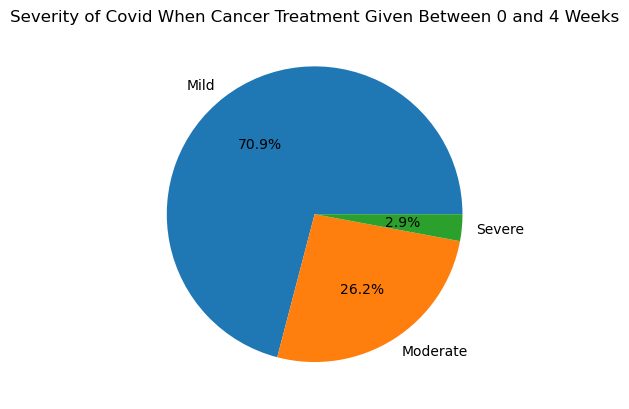

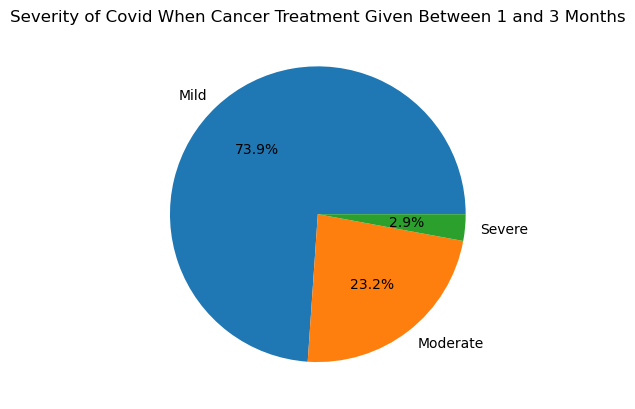

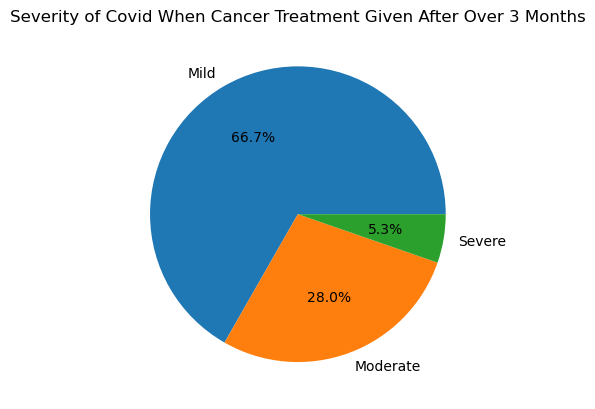

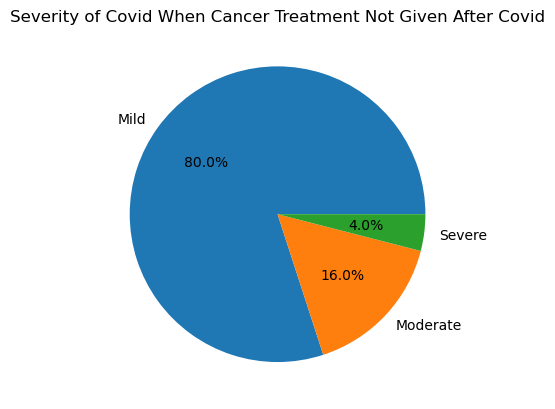

In [56]:
# Data Visualization for Comparing the timing of Cancer Treatment to their Covid Outcome - PIE CHARTS

labels = ["Mild", "Moderate", "Severe"]

# Pie Chart for O-4 Weeks
plt.pie(zero_to_four_list, labels=labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer Treatment Given Between 0 and 4 Weeks")
plt.show()


# Pie Chart for 1-3 Months
plt.pie(one_to_three_list, labels=labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer Treatment Given Between 1 and 3 Months")
plt.show()

# Pie Chart for Over 3 Months
plt.pie(over_three_list, labels=labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer Treatment Given After Over 3 Months")
plt.show()

# Pie Chart for Never
plt.pie(never_list, labels=labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer Treatment Not Given After Covid")
plt.show()

In [ ]:
# Complete a statistical analysis to see if there is any difference between the 4 groups
# See if there is any statistical difference between the outcomes when cancer treatment is given at different times

In [ ]:
# Further analyze data by comparing the different types of cancer groups and seeing if that plus the
# timing of Cancer treatment has an effect on Covid outcomes


In [ ]:
# Further analyze the data to see if the type of cancer treatment had any effect on the covid outcome